In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm


DATADIR="F:/TensorFlow/PetImages"
CATEGORIES=["Cat","Dog"]
IMG_SIZE=64

In [2]:
training_data = []

def create_training_data():
    
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 12501/12501 [01:59<00:00, 104.32it/s]

24946


In [3]:
len(training_data)

24946

In [4]:
import random

random.shuffle(training_data)

x=[]
y=[]

for features,labels in training_data:
    x.append(features)
    y.append(labels)

In [5]:
x=np.array(x)
y=np.array(y)
x.shape


(24946, 64, 64)

In [6]:
import pickle

pickle_out = open("x_64.pickle","wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

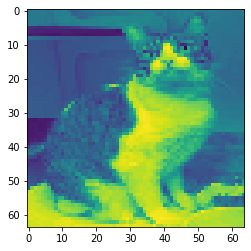

In [7]:
i=6000
plt.imshow(x[i])
plt.show()

In [21]:
y[i]

0

In [121]:
from keras.utils import to_categorical

x_train=x[:24000]
x_test=x[24000:]
y_train=y[:24000]
y_test=y[24000:]

Y_train=to_categorical(y_train,2)
Y_test=to_categorical(y_test,2)
x_train.shape

np.max(x_train[0])

255

In [46]:
from keras.models import Sequential
from keras.layers import Conv2D,Activation,Dense,MaxPooling2D,Flatten

In [99]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))

model.add(Dense(64,activation='relu'))

model.add(Flatten())

model.add(Dense(2,activation='softmax'))


In [96]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dense_5 (Dense)              (None, 15, 15, 64)        2112      
_________________________________________________________________
flatten_4 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 28802     
Total params: 31,810
Trainable params: 31,810
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [120]:
model.fit(x_train,Y_train,epochs=30,batch_size=256,validation_split=0.1)

Train on 21600 samples, validate on 2400 samples
Epoch 1/30
21600/21600 [==============================] - 21s 995us/step - loss: 0.6045 - accuracy: 0.7361 - val_loss: 0.7992 - val_accuracy: 0.6871
Epoch 2/30
21600/21600 [==============================] - 21s 960us/step - loss: 0.5391 - accuracy: 0.7551 - val_loss: 0.7742 - val_accuracy: 0.6867
Epoch 3/30
21600/21600 [==============================] - 21s 963us/step - loss: 0.4877 - accuracy: 0.7789 - val_loss: 0.7811 - val_accuracy: 0.6954
Epoch 4/30
21600/21600 [==============================] - 22s 1ms/step - loss: 0.4566 - accuracy: 0.7925 - val_loss: 0.7663 - val_accuracy: 0.6983
Epoch 5/30
21600/21600 [==============================] - 21s 992us/step - loss: 0.4235 - accuracy: 0.8053 - val_loss: 0.8072 - val_accuracy: 0.6854
Epoch 6/30
21600/21600 [==============================] - 23s 1ms/step - loss: 0.4028 - accuracy: 0.8152 - val_loss: 0.7920 - val_accuracy: 0.6862
Epoch 7/30
21600/21600 [==============================] - 22s

In [122]:
loss,acc=model.evaluate(x_test,Y_test)
print(loss)
print(acc)

946/946 [==============================] - 0s 446us/step
1.1100009455489306
0.7124735713005066


In [123]:
# x[0].shape
i=12024
# convert 3d to 4d 
image = np.expand_dims(x[i], axis=0)
# image.shape
p=model.predict([image])
np.argmax(p[0])
# x_test.shape

1

In [124]:
y[i]

1

In [126]:
model.save('dog_cat_71.model')